<h1 style='color:DarkBlue' align='center'>Cohort and RFM analysis -Retail Domain</h1>

### This is unsupervised learning method to understand the customer group behaviour to decide marketing strategies.

In [1]:
# install and import all required libraries

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [3]:
retail_df = pd.read_excel("Online Retail.xlsx",parse_dates=['InvoiceDate'])
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Preprocessing

In [4]:
df=retail_df.copy()

In [5]:
df.shape

(541909, 8)

In [6]:
df.duplicated().sum()#checking for any duplicate record

5268

In [7]:
df=df[~df.duplicated()]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      536641 non-null object
StockCode      536641 non-null object
Description    535187 non-null object
Quantity       536641 non-null int64
InvoiceDate    536641 non-null datetime64[ns]
UnitPrice      536641 non-null float64
CustomerID     401604 non-null float64
Country        536641 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [9]:
df.shape

(536641, 8)

**Cohort:**

A cohort is a group of users sharing a particular characteristic. Strictly speaking it can be any characteristic, but typically the term cohort refers to a time-dependent grouping. For example, a typical cohort groups users by the week or month when they were first acquired. When speaking of groupings that are not time-dependent, the term segment is typically used instead of cohort.

**Cohort Analysis:**

Cohort analysis refers to tracking and investigating the performance of cohorts over time.
For example, if you wanted to see if users you’re acquiring now are more or less valuable than users you’ve acquired in the past, you can define cohorts by the month when they were first acquired. You can then run a cohort analysis to compare year-over-year revenue performance. You can also use cohort Analysis to group users/Customers.

**For time cohort analysis, we will use:**

*DateTime column*

*Price Column*

*CustomerID column*.

### Looking for Descriptive Stats

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


* The min and max value for Quantity is 80995,this could represent cancelled or returned orders.
* The UnitPrice also have few negative values which is uncommon,these transactions could represent cancelled orders by customers  or bad-debt incurred by the business.
* Bad debt adjustments will be dropped from the dataset as these do not represent actual sales

In [11]:
# df.Quantity=np.absolute(df.Quantity)

In [12]:
# df.UnitPrice=np.absolute(df.UnitPrice)

In [13]:
#For the sake of calculating recency and frequency, drop the rows with negative values of Quantity and store the data in final_df
df =df[df['Quantity'] > 0]

In [14]:
df.nunique()

InvoiceNo      20728
StockCode       3941
Description     4077
Quantity         393
InvoiceDate    19052
UnitPrice       1293
CustomerID      4339
Country           38
dtype: int64

In [15]:
df.CustomerID.isnull().sum()

133322

In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,526054.000000,526054.000000,392732.000000
mean,10.730874,3.871747,15287.734822
std,157.591838,42.016560,1713.567773
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13955.000000
50%,4.000000,2.080000,15150.000000
75%,11.000000,4.130000,16791.000000
max,80995.000000,13541.330000,18287.000000


In [17]:
#as we have to cohort(segment) customers based on their ID we will remove all missing values in customerID

In [18]:
df.dropna(inplace=True)
# same can be done with df= df[np.isfinite(df['CustomerID'])] this function

In [19]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [20]:
print('Min:{}; Max:{}'.format(min(df.InvoiceDate),max(df.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


## Cohort Analysis: Retention Rate

customer retention will cause less cost agains aquiring new customers. so we will focus retain to old customer thus we are calculating retention rate.

**Effective strategies**

1. communication calender
2. customer loyalty program
3. customer relationship management
4. beneficial customers after purchase(feedback from csustomer).

In [21]:
#We are looking at the behavior of our users on a monthly basis, therefore we don't want granular 'InvoiceDate' right now.

df['InvoiceMonth'] = df.InvoiceDate.apply(lambda x: x.strftime('%Y-%m'))
df['InvoiceMonth']=pd.to_datetime(df['InvoiceMonth'])
df[['CustomerID','InvoiceMonth']]

,CustomerID,InvoiceMonth
0,17850.0,2010-12-01
1,17850.0,2010-12-01
2,17850.0,2010-12-01
3,17850.0,2010-12-01
4,17850.0,2010-12-01
...,...,...
541904,12680.0,2011-12-01
541905,12680.0,2011-12-01
541906,12680.0,2011-12-01
541907,12680.0,2011-12-01


**Determine the user's cohort group (based on their first order)**

In [22]:
group = df.groupby('CustomerID')['InvoiceMonth']

In [23]:
#Create a new column called CohortMonth, which is the 1st day of respective year and month in which the user's first purchase occurred.
df['CohortMonth'] = group.transform('min')
df[['CustomerID','InvoiceDate','InvoiceMonth', 'CohortMonth']].head()

,CustomerID,InvoiceDate,InvoiceMonth,CohortMonth
0,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01
1,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01
2,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01
3,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01
4,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01


### We will use the integer values by extracting to calculate business metrics for our time cohorts:
We will calculate the difference between the Invoice Dates and Cohort dates in years, months separately.
then calculate the total Months difference between the two.
This will be our Months offset or cohort Index, which we will use in the next section to calculate retention rate.

In [24]:

# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month = df['InvoiceDate'].dt.year,df['InvoiceDate'].dt.month

# Get the integers for date parts from the `CohortDay` column

cohort_year, cohort_month = df['CohortMonth'].dt.year,df['CohortMonth'].dt.month


In [25]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Using the variables created above to calcualte the difference in days and storing them in cohort Index column
df['CohortIndex'] = (years_diff * 12 + months_diff+ 1)

In [26]:
df[['CustomerID','InvoiceMonth', 'CohortMonth', 'CohortIndex']].head()


,CustomerID,InvoiceMonth,CohortMonth,CohortIndex
0,17850.0,2010-12-01,2010-12-01,1
1,17850.0,2010-12-01,2010-12-01,1
2,17850.0,2010-12-01,2010-12-01,1
3,17850.0,2010-12-01,2010-12-01,1
4,17850.0,2010-12-01,2010-12-01,1


In [27]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])

# printing len of group by object
len(grouping)
# Counting the number of unique values per customer ID in each group and storing in a Dataframe
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Assigning column names to the dataframe created above
cohort_data.columns = ['CohortMonth','CohortIndex','TotalUsers']

# Printing top 5 rows of Dataframe
cohort_data.head()

,CohortMonth,CohortIndex,TotalUsers
0,2010-12-01,1,885
1,2010-12-01,2,324
2,2010-12-01,3,286
3,2010-12-01,4,340
4,2010-12-01,5,321


In [28]:
df['TotalPrice']=df.UnitPrice*df.Quantity

In [29]:
#Since we're looking at monthly cohorts, we need to aggregate users, orders, 
#and amount spent by the CohortGroup within the month (InvoiceMonth)

grouped = df.groupby(['CohortMonth', 'InvoiceMonth'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'CustomerID': pd.Series.nunique,
                       'Quantity': pd.Series.nunique,
                       'CohortIndex':pd.Series.max,
                       'TotalPrice': np.sum})

# make the column names more meaningful
cohorts.rename(columns={'CustomerID': 'TotalUsers',
                        'Quantity': 'TotalOrders',
                        }, inplace=True)


In [30]:
cohorts.head(20)

TotalUsers  TotalOrders  CohortIndex  TotalPrice
CohortMonth InvoiceMonth                                                  
2010-12-01  2010-12-01         885.0          105            1   570422.73
            2011-01-01         324.0           81            2   275734.47
            2011-02-01         286.0           78            3   233390.47
            2011-03-01         340.0           83            4   302367.44
            2011-04-01         321.0           71            5   204034.38
            2011-05-01         352.0           87            6   336113.69
            2011-06-01         321.0           95            7   313668.16
            2011-07-01         309.0           89            8   310304.03
            2011-08-01         313.0          102            9   331001.07
            2011-09-01         350.0          116           10   471792.13
            2011-10-01         331.0          113           11   455478.90
            2011-11-01         445.0          116           12   512341.08
            2011-12-01         235.0           80           13   185360.97
2011-01-01  2011-01-01         417.0           63            1   292366.84
            2011-02-01          92.0           50            2    54993.86
            2011-03-01         111.0           52            3    63157.01
            2011-04-01          96.0           51            4    71526.09
            2011-05-01         134.0           49            5    80989.77
            2011-06-01         120.0           59            6    84464.57
            2011-07-01         103.0           53            7    70073.35

In [31]:
# Creating new dataframe with index as CohortMonth, columns as Cohort indexes and Values as Count
retention_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='TotalUsers')

# Printing top 5 rows of Pivoted dataframe
retention_counts.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN


In [32]:
# Select the first column and store it to cohort_sizes
cohort_sizes = retention_counts.iloc[:,0]

In [33]:
# Divide the cohort count by cohort sizes along the rows
retention_rate = retention_counts.divide(cohort_sizes, axis=0)

# Coverting the retention rate into percentage and Rounding off.
retention_rate

# printing top 5 rows of retention Rate
retention_rate.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
retention_rate.index = retention_rate.index.strftime('%Y-%m')
retention_rate.index

Index(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12'],
      dtype='object')

[Text(0, 0.5, '2010-12'),
 Text(0, 1.5, '2011-01'),
 Text(0, 2.5, '2011-02'),
 Text(0, 3.5, '2011-03'),
 Text(0, 4.5, '2011-04'),
 Text(0, 5.5, '2011-05'),
 Text(0, 6.5, '2011-06'),
 Text(0, 7.5, '2011-07'),
 Text(0, 8.5, '2011-08'),
 Text(0, 9.5, '2011-09'),
 Text(0, 10.5, '2011-10'),
 Text(0, 11.5, '2011-11'),
 Text(0, 12.5, '2011-12')]

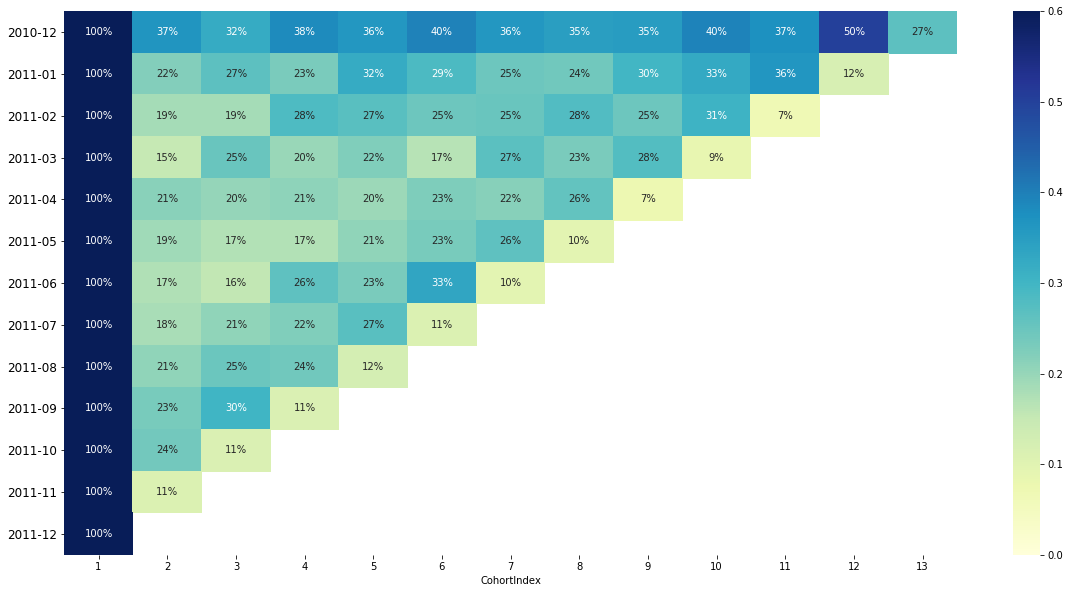

In [35]:
import seaborn as sns
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
# Creating the heatmap
g=sns.heatmap(retention_rate, annot=True, fmt= '.0%',cmap='YlGnBu', vmin = 0 , vmax =0.6)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12)

### The retention Rate dataframe represent Customer retained across Cohurts. We can read it as following:

* Index value represents the Cohort
* Columns represent the number of months since current Cohort
* for example the value at index 2010-12-01 column 7 is 34.8 and Represents 34.8% of customers from cohort 2010-12 were retained in 7th Month.

**Also you can see from the retention Rate DataFrame:**
* Retention Rate 1st index i.e 1st month is 100% as all the customers for that particular customers signed up in 1st Month
* Retention Rate may increase or decrease in Subsequent Indexes.
* Values towards BottomRight have a lot of NaN values
* Can You think of the reason for the number of NaN values towards RIGHT BOTTOM ?

Yes, As you might have Guessed, The Cohort Indexes towards Right represent Number of Months away the Values are from Current Cohort. Thus the values at Bottom Right cells don't have data of acquisition as they are too recent

#  Conclusion:
Cohort analysis is a unique opportunity to find out which clients are the most valuable to their business.
by performing Cohort analysis you can get following answers to following questions:

1. How much effective was a marketing campaign held in a particular time period.
2. Did the strategy employed to improve the conversion rates of Customers worked?
3. Should I focus more on retention rather than acquiring new customers?
4. Are our strategies effective?
5. Which marketing channels bring me the best results?

## Calculate RFM value of each customer

In [36]:
#Calculate recency and frequency
Max_Date_in_data = dt.datetime(2011,12,10)

In [37]:

rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Max_Date_in_data - x.max()).days, 'InvoiceNo': lambda x: len(x),'TotalPrice': lambda x: x.sum()})
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)
rfm_df.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency',
                       'TotalPrice': 'monetary_value'}, inplace=True)

In [38]:
rfm_df.head()


,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


In [39]:
rfm_df.shape

(4339, 3)

In [40]:
#Sorting first on frequency and then on Monetary value
rfm_df.sort_values(['frequency', 'monetary_value'], ascending=[False, False], inplace=True)

In [41]:
#top 10 customers based on frequency and monetary values¶
rfm_df.head(10)


,recency,frequency,monetary_value
CustomerID,,,
17841.0,1,7676,40519.84
14911.0,1,5672,143711.17
14096.0,4,5111,65164.79
12748.0,0,4413,33053.19
14606.0,1,2677,12076.15
15311.0,0,2366,60632.75
14646.0,1,2080,280206.02
13089.0,2,1814,58762.08
13263.0,1,1667,7436.93


In [42]:
rfm_df.reset_index(inplace=True)

### Now, we will find optimal number of clusters using elbow methods and create Kmeans clustering using Pycaret

In [43]:
from pycaret.clustering import *

In [44]:
#creating setup
Clust = setup(rfm_df, normalize = True, 
                   ignore_features = ['CustomerID'],
                   session_id = 123)


Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Original Data,"(4339, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(4339, 3)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [45]:
kmeans = create_model('kmeans')
print(kmeans)

KMeans(n_clusters=4, random_state=123)


### Elbow Plot method to decide number of clusters

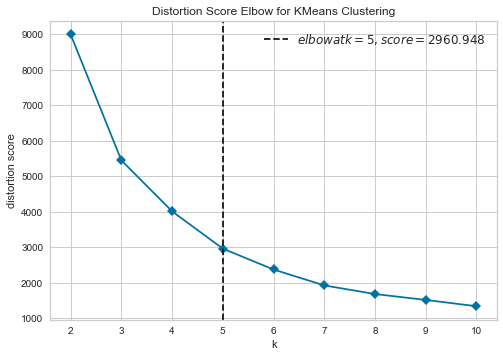

In [46]:
plot_model(kmeans, plot = 'elbow')

Above plot suggests that optimal number of clusters are 5,so we will create our model with 5 clusters

In [47]:
kmeans = create_model('kmeans', num_clusters=5)
print(kmeans)

KMeans(n_clusters=5, random_state=123)


In [48]:
#assign the model to see the results
kmean_results = assign_model(kmeans)
kmean_results


,CustomerID,recency,frequency,monetary_value,Cluster
0,17841.0,1,7676,40519.84,Cluster 2
1,14911.0,1,5672,143711.17,Cluster 2
2,14096.0,4,5111,65164.79,Cluster 2
3,12748.0,0,4413,33053.19,Cluster 2
4,14606.0,1,2677,12076.15,Cluster 0
...,...,...,...,...,...
4334,15823.0,372,1,15.00,Cluster 1
4335,17763.0,263,1,15.00,Cluster 1
4336,17956.0,249,1,12.75,Cluster 1
4337,16738.0,297,1,3.75,Cluster 1


In [49]:
plot_model(kmeans,plot='tsne')

In [50]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters

In [53]:
# kmean_results.groupby('Cluster').mean()
def Final_cluster_df(df):

    df_new = df.groupby(['Cluster']).agg({
        'recency': 'mean',
        'frequency': 'mean',
        'monetary_value': ['mean', 'count']
    }).round(0)
    
    return df_new
results= Final_cluster_df(kmean_results)
results

recency frequency monetary_value      
             mean      mean           mean count
Cluster                                         
Cluster 0    16.0     474.0        11752.0   249
Cluster 1   249.0      27.0          489.0  1055
Cluster 2     2.0    5718.0        70612.0     4
Cluster 3    44.0      72.0         1328.0  3025
Cluster 4     7.0     827.0       190809.0     6

# conclusion
* The **Fifth** and **third** cluster belongs to the "Best Customers" segment they purchase recently, most frequent buyers, and spent the most.
* we should have to focus to increase such customers so that highest revenue can be earned
* we should have to focus to **second** cluster customers as they are recent and we should look for their retention.